# Pérdida subrogada

Llamamos pérdida subrogada a cualquier cota superior de la pérdida 01 que sea ajustada y más fácil de optimizar. Se suelen usar en clasificación binaria, con etiquetas $\tilde{y}\in\{-1, 1\}$ y clasificador de log-odds $\eta=f(\boldsymbol{x}; \boldsymbol{\theta})$
$$p(\tilde{y}\mid\boldsymbol{x},\boldsymbol{\theta})=\sigma(\tilde{y}\eta)=\frac{1}{1+e^{-\tilde{y}\eta}}$$
$\boldsymbol{x}$ se clasificará correctamente si $\tilde{y}=-1$ y $\eta<0$, o $\tilde{y}=1$ y $\eta>0$; esto es, si $\tilde{y}\eta>0$. Así pues, $\tilde{y}\eta$ puede verse como un **margen de seguridad:** debe ser positivo para que no haya error de clasificación y, cuanto mayor sea, mayor seguridad nos ofrece el clasificador. Por el contrario, si el margen es negativo,
se producirá error de clasificación y, cuanto menor sea, menor seguridad tendremos en el clasificador.

Consideremos la pérdida 01 en función del margen $\tilde{y}\eta$:

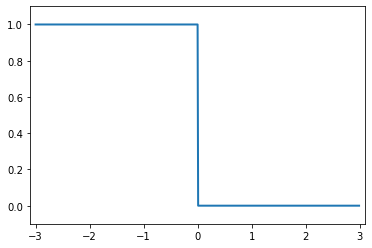

In [1]:
import numpy as np
import matplotlib.pyplot as plt

zeroOne = np.vectorize(lambda x: 1 * (x <= 0))
x = np.arange(-3, 3, .01)
plt.plot(x, zeroOne(x), linewidth=2)
plt.axis([-3.1, 3.1, -0.1, 1.1]);

Aparte de no ser fácil de minimizar (por el salto en $0$), la pérdida 01 no tiene cuenta el margen de seguridad del clasificador: da lo mismo acertar con poco margen o mucho; y también da lo mismo fallar por poco o mucho. Las pérdidas subrogadas facilitan la minimización de la 01 y tienen en cuenta el margen para medir la pérdida:
$$\begin{align*}
&\text{Log-pérdida:}     &&\ell_{ll}(\tilde{y},\eta)=-\log_2 p(\tilde{y}\mid\eta)=\log_2(1+e^{-\tilde{y}\eta})\\%
&\text{Hinge (bisagra):} &&\ell_{\text{hinge}}(\tilde{y},\eta)=\max(0,1-\tilde{y}\eta)=(1-\tilde{y}\eta)_+\\%
&\text{Exponencial:}     &&\ell_{\text{exp}}(\tilde{y},\eta)=e^{-\tilde{y}\eta}\\%
\end{align*}$$

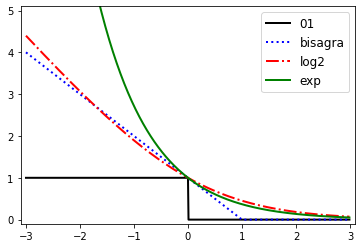

In [2]:
import numpy as np
import matplotlib.pyplot as plt

zeroOne = np.vectorize(lambda x: 1 * (x <= 0))
hinge = np.vectorize(lambda x: max(0, 1-x))
logLoss =  np.vectorize(lambda x: np.log2(1 + np.exp(-x)))
expLoss =  np.vectorize(lambda x: np.exp(-x))
funs = [zeroOne, hinge, logLoss, expLoss]
styles = ['k-', 'b:', 'r-.', 'g-']
labels = ['01', 'bisagra', 'log2', 'exp']
x = np.arange(-3, 3, .01)
for i, fun in enumerate(funs):
  plt.plot(x, fun(x), styles[i], label=labels[i], linewidth=2)
plt.axis([-3.1, 3.1, -0.1, 5.1])
plt.legend(fontsize=12);